In [20]:
from io import StringIO
import requests
import json
import pandas as pd
import numpy as np
from sklearn import preprocessing

 
#data_1.head
data_chunk_1 = pd.read_csv('historical_data1_Q42009.txt', low_memory=False,sep="|", header = None)
data_chunk_2 = pd.read_csv('historical_data1_Q12010.txt', low_memory=False,sep="|", header = None) 

def preprocess(data_1):

    data_1.columns = ['fico','dt_first_pi','flag_fthb','dt_matr','cd_msa',"mi_pct",'cnt_units',
                      'occpy_sts','cltv','dti','orig_upb','ltv','int_rt','channel','ppmt_pnlty',
                      'prod_type','st', 'prop_type','zipcode','id_loan','loan_purpose', 
                      'orig_loan_term','cnt_borr','seller_name','servicer_name', 'flag_sc']

    data_1.fico = data_1.fico.replace(r'\s+', np.nan, regex=True).astype('float64')
    data_1.update(data_1[['fico']].fillna(data_1['fico'].mode()[0]))


    for i, row in data_1.iterrows():
        data_1.set_value(i,'dt_first_pi',((int(str(row['dt_first_pi'])[:4]) - 1990)*12*30 + (int(str(row['dt_first_pi'])[4:6])*30)))

    data_1.flag_fthb = data_1.flag_fthb.replace(r'\s+', np.nan, regex=True)
    data_1['flag_fthb'] = (data_1[['flag_fthb']].fillna(3))
    data_1.flag_fthb.replace('N', 0 , inplace = True)
    data_1.flag_fthb.replace('Y', 0 , inplace = True)
    data_1.flag_fthb = data_1.flag_fthb.astype('category')

    for i, row in data_1.iterrows():
        data_1.set_value(i,'dt_matr',((int(str(row['dt_matr'])[:4]) - 1990)*12*30 + (int(str(row['dt_matr'])[4:6])*30)))

    data_1.mi_pct = data_1.mi_pct.replace(r'\s+', np.nan, regex=True)
    data_1.mi_pct = data_1.mi_pct.astype('float64')
    mean = data_1.mi_pct.mean()
    data_1['mi_pct'] = (data_1[['mi_pct']].fillna(mean))

    data_1.cnt_units = data_1.cnt_units.replace(r'\s+', np.nan, regex=True)
    data_1.update(data_1[['cnt_units']].fillna(0))

    data_1.occpy_sts = data_1.occpy_sts.replace(r'\s+', np.nan, regex=True)
    data_1['occpy_sts'] = (data_1[['occpy_sts']].fillna(0))
    data_1.occpy_sts.replace('O', 1 , inplace = True)
    data_1.occpy_sts.replace('I', 2 , inplace = True)
    data_1.occpy_sts.replace('S', 3 , inplace = True)
    data_1.occpy_sts = data_1.occpy_sts.astype('category')

    data_1.cltv = data_1.cltv.replace(r'\s+', np.nan, regex=True).astype('float64')
    data_1.update(data_1[['cltv']].fillna(data_1['cltv'].mean()))

    data_1.dti = data_1.dti.replace(r'\s+', np.nan, regex=True).astype('float64')
    data_1.update(data_1[['dti']].fillna(65))

    data_1.ltv = data_1.ltv.replace(r'\s+', np.nan, regex=True)
    data_1.ltv = data_1.ltv.astype('float64')
    mean = data_1.ltv.mean()
    data_1['ltv'] = (data_1[['ltv']].fillna(mean))
    
    data_1.int_rt = data_1.int_rt.replace(r'\s+', np.nan, regex=True)
    data_1.int_rt = data_1.int_rt.astype('float64')
    mean_int_rt = data_1.int_rt.mean()
    data_1['int_rt'] = data_1[['int_rt']].fillna(mean_int_rt)
    data_1.int_rt = data_1.int_rt.astype('float64')

    data_1.channel = data_1.channel.replace(r'\s+', np.nan, regex=True)
    data_1['channel'] = (data_1[['channel']].fillna(0))
    data_1.channel.replace('R', 1 , inplace = True)
    data_1.channel.replace('B', 2 , inplace = True)
    data_1.channel.replace('C', 3 , inplace = True)
    data_1.channel.replace('T', 4 , inplace = True)
    data_1.channel = data_1.channel.astype('category')

    data_1.ppmt_pnlty = data_1.ppmt_pnlty.replace(r'\s+', np.nan, regex=True)
    data_1['ppmt_pnlty'] = (data_1[['ppmt_pnlty']].fillna(2))
    data_1.ppmt_pnlty.replace('Y', 1 , inplace = True)
    data_1.ppmt_pnlty.replace('N', 0 , inplace = True)
    data_1.ppmt_pnlty = data_1.ppmt_pnlty.astype('category')

    data_1.prop_type = data_1.prop_type.replace(r'\s+', np.nan, regex=True)
    data_1['prop_type'] = (data_1[['prop_type']].fillna(0))
    data_1.prop_type.replace('P', 1 , inplace = True)
    data_1.prop_type.replace('SF', 1 , inplace = True)
    data_1.prop_type.replace('CO', 2 , inplace = True)
    data_1.prop_type.replace('PU', 3 , inplace = True)
    data_1.prop_type.replace('MH', 4 , inplace = True)
    data_1.prop_type.replace('LH', 5 , inplace = True)
    data_1.prop_type.replace('CP', 6 , inplace = True)


    data_1.zipcode = data_1.zipcode.replace(r'\s+', np.nan, regex=True)
    data_1['zipcode'] = (data_1[['zipcode']].fillna(0))
    data_1.zipcode.replace(np.nan, 0 , inplace = True)

    data_1.loan_purpose = data_1.loan_purpose.replace(r'\s+', np.nan, regex=True)
    data_1['loan_purpose'] = (data_1[['loan_purpose']].fillna(0))
    data_1.loan_purpose.replace('P', 1 , inplace = True)
    data_1.loan_purpose.replace('C', 2 , inplace = True)
    data_1.loan_purpose.replace('N', 3 , inplace = True)

    data_1.cnt_borr = data_1.cnt_borr.replace(r'\s+', np.nan, regex=True)
    data_1['cnt_borr'] = (data_1[['cnt_borr']].fillna(0))
    data_1.cnt_borr = data_1.cnt_borr.astype('category')
    
    data_1.drop(data_1.columns[[4,7,8,9,14,15,16,17,18,19,22,23,24,25]], axis=1, inplace=True)


    
preprocess(data_chunk_1)
preprocess(data_chunk_2)  

y_train = data_chunk_1['int_rt']
x_train_raw = data_chunk_1.drop('int_rt', axis=1)
x_train = preprocessing.minmax_scale(x_train_raw)

y_test = data_chunk_2['int_rt']
x_test_raw = data_chunk_2.drop('int_rt', axis=1)
x_test = preprocessing.minmax_scale(x_test_raw)
# df[cols]=df.filter(cols).fillna(mode.iloc[0])

### RMS,MAE and MAPE values for train data - Q12005 and test data - Q22005 using Linear Regression

In [17]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


lm = LinearRegression()
lm.fit(x_train, y_train)

data_estimate_train = lm.predict(x_train)
data_estimate_test = lm.predict(x_test)

rms_train = mean_squared_error(y_train, data_estimate_train)
rms_test = mean_squared_error(y_test, data_estimate_test)

mae_train = mean_absolute_error(y_train, data_estimate_train)
mae_test = mean_absolute_error(y_test, data_estimate_test)


mape_train = np.mean(np.abs((y_train - data_estimate_train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - data_estimate_test) / y_test)) * 100

#data_estimate_test
#y_test

print("rms_train = ",rms_train,"   rms_test = ",rms_test )
print("mae_train = " ,mae_train ,"   mae_test = ",mae_test )
print("mape_train = " ,float(mape_train),"   mape_test = ",float(mape_test))


rms_train =  0.0859702808563    rms_test =  0.510252778377
mae_train =  0.216502405869    mae_test =  0.64888928624
mape_train =  3.8283712478022625    mape_test =  11.008430184214205


### RMS,MAE and MAPE values for train data - Q12005 and test data - Q22005 using Random ForestAlgorithm

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# y_train = pd.DataFrame(data_chunk_1['int_rt'].astype('float64'))

# y1 =  pd.DataFrame(data=y_train[1:,1:], index=y_train[1:,0],columns=y_train[0,1:])


rf = RandomForestRegressor(n_estimators=15)
rf.fit(x_train, y_train.values.ravel())

data_estimate_train = rf.predict(x_train)
data_estimate_test = rf.predict(x_test)


rms_train = mean_squared_error(y_train, data_estimate_train)
rms_test = mean_squared_error(y_test, data_estimate_test)

mae_train = mean_absolute_error(y_train, data_estimate_train)
mae_test = mean_absolute_error(y_test, data_estimate_test)

mape_train = np.mean(np.abs((y_train - data_estimate_train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - data_estimate_test) / y_test)) * 100


print("rms_train = ",rms_train,"   rms_test = ",rms_test )
print("mae_train = " ,mae_train ,"   mae_test = ",mae_test )
print("mape_train = " ,float(mape_train),"   mape_test = ",float(mape_test))
#  !pip install --user --upgrade sklearn



rms_train =  0.0191393367107    rms_test =  0.122083863376
mae_train =  0.0979136925705    mae_test =  0.270062497132
mape_train =  1.962487392854624    mape_test =  5.614760024901151


### RMS,MAE and MAPE values for train data - Q12005 and test data - Q22005 Nueral Network Algorithm

In [9]:
import operator
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor


nn = MLPRegressor()
nn.fit(x_train, y_train)

data_estimate_train = nn.predict(x_train)
data_estimate_test = nn.predict(x_test)

rms_train = mean_squared_error(y_train, data_estimate_train)
rms_test = mean_squared_error(y_test, data_estimate_test)

mae_train = mean_absolute_error(y_train, data_estimate_train)
mae_test = mean_absolute_error(y_test, data_estimate_test)


mape_train = np.mean(np.abs((y_train - data_estimate_train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - data_estimate_test) / y_test)) * 100

print("rms_train = ",rms_train,"   rms_test = ",rms_test )
print("mae_train = " ,mae_train ,"   mae_test = ",mae_test )
print("mape_train = " ,mape_train,"   mape_test = ",mape_test )

rms_train =  0.0802692745562    rms_test =  0.863215322411
mae_train =  0.209203932186    mae_test =  0.878335304454
mape_train =  3.6888071977184254    mape_test =  14.976243535459915


### Feature selection using exhaustive search method 

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sff7-58a84c67e1da6e-fa49d0174b0c/R/libs’
(as ‘lib’ is unspecified)
Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”

Reordering variables and trying again:
[1] "['fico','dt_first_pi','flag_fthb','dt_matr','cd_msa','mi_pct','cnt_units', 'occpy_sts','cltv','dti','orig_upb','ltv','int_rt','channel','ppmt_pnlty','prod_type','st', 'prop_type','zipcode','id_loan','loan_purpose', \n       'orig_loan_term','cnt_borr','seller_name','servicer_name', 'flag_sc']"


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 35085.53 32867.55 31893.27 31330.50 30750.67 30491.84 30356.04 30236.74
 [9] 30156.88 30076.25 30008.35 29959.23 29952.67 29952.47 29952.41

[1] 0.2627250 0.3093309 0.3298022 0.3416262 0.3538089 0.3592461 0.3620978
 [8] 0.3646031 0.3662794 0.3679720 0.3693971 0.3704275 0.3705637 0.3705659
[15] 0.3705654

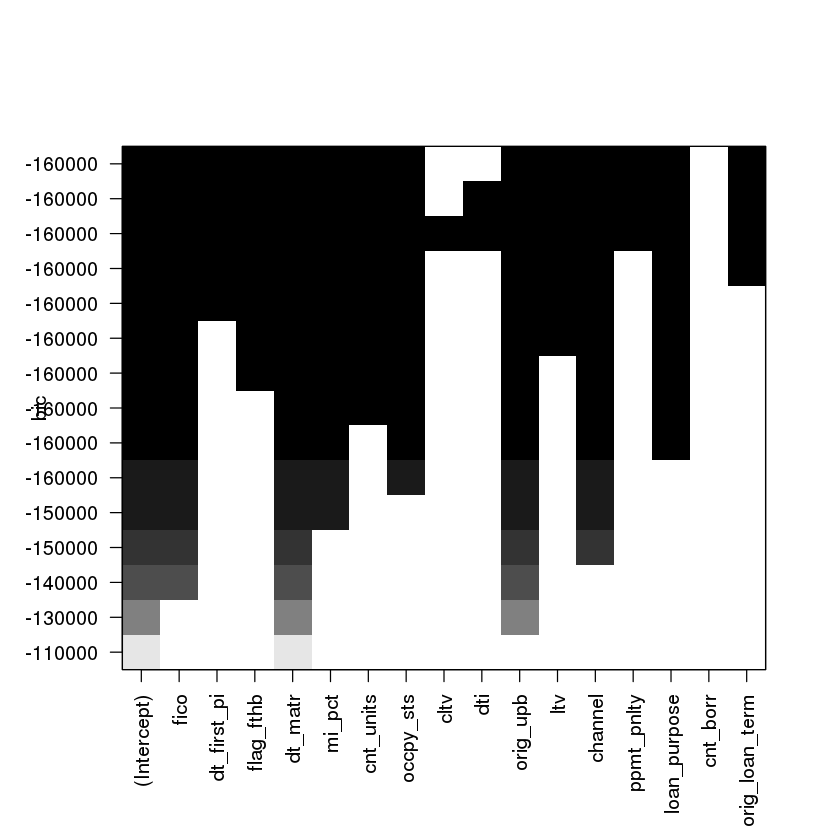

In [10]:
# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
getObjectStorageFileWithCredentials_36050ddb3c4f40a18a7f066830ed7d30 <- function(container, filename) {
    # This functions returns a textConnection object for a file
    # from Bluemix Object Storage.

    if(!require(httr)) install.packages('httr')
    if(!require(RCurl)) install.packages('RCurl')
    library(httr, RCurl)
    auth_url <- paste("https://identity.open.softlayer.com",'/v3/auth/tokens', sep= '')
    auth_args <- paste('{"auth": {"identity": {"password": {"user": {"domain": {"id": ', "acc42c12cff74f9fb5e0ce17640fc696",'},"password": ',
                    "m59^Vn2*eZk]Ow!4",',"name": ', "member_dbe4519ae34079f48b969553bfa91d61699393ca",'}},"methods": ["password"]}}}', sep='"')
    auth_response <- httr::POST(url = auth_url, body = auth_args)
    x_subject_token <-  headers(auth_response)[['x-subject-token']]
    auth_body <-  content(auth_response)
    access_url <-  unlist(lapply(auth_body[['token']][['catalog']], function(catalog){
        if((catalog[['type']] == 'object-store')){
            lapply(catalog[['endpoints']], function(endpoints){
                if(endpoints[['interface']] == 'public' && endpoints[['region_id']] == 'dallas') {
                    paste(endpoints[['url']], container, filename, sep='/')}
            })
        }
    }))
    data <- content(httr::GET(url = access_url, add_headers ("Content-Type" = "application/json", "X-Auth-Token" = x_subject_token)), as="text")
    textConnection(data)
}

# Your data file was loaded into a textConnection object and you can process the data with your package of choice.
#data.3 <- getObjectStorageFileWithCredentials_36050ddb3c4f40a18a7f066830ed7d30("MidTerm", "clean.csv")
df.data.1 <-  read.csv(file = getObjectStorageFileWithCredentials_36050ddb3c4f40a18a7f066830ed7d30("MidTerm", "clean.csv"))
install.packages("leaps")
library(leaps)
##### Searching all subset models up to size 8 by default 
regfit.full=regsubsets(int_rt~.,data=df.data.1,method="exhaustive",nvmax = 17)
plot(regfit.full)
reg.summary = summary(regfit.full) 
        
print("['fico','dt_first_pi','flag_fthb','dt_matr','cd_msa','mi_pct','cnt_units', 'occpy_sts','cltv','dti','orig_upb','ltv','int_rt','channel','ppmt_pnlty','prod_type','st', 'prop_type','zipcode','id_loan','loan_purpose', 
       'orig_loan_term','cnt_borr','seller_name','servicer_name', 'flag_sc']")

names(reg.summary)
reg.summary$rss
reg.summary$adjr2         

### Feature Selection using Forward Search

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”

Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“number of items to replace is not a multiple of replacement length”

[1] "['fico','dt_first_pi','flag_fthb','dt_matr','cd_msa','mi_pct','cnt_units', 'occpy_sts','cltv','dti','orig_upb','ltv','int_rt','channel','ppmt_pnlty','prod_type','st', 'prop_type','zipcode','id_loan','loan_purpose', \n       'orig_loan_term','cnt_borr','seller_name','servicer_name', 'flag_sc']"


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 35085.53 32867.55 31893.27 31330.50 30750.67 30491.84 30356.04 30236.74
 [9] 30156.88 30076.25 30008.35 29959.23 29952.67 29952.47 29952.41

[1] 0.2627250 0.3093309 0.3298022 0.3416262 0.3538089 0.3592461 0.3620978
 [8] 0.3646031 0.3662794 0.3679720 0.3693971 0.3704275 0.3705637 0.3705659
[15] 0.3705654

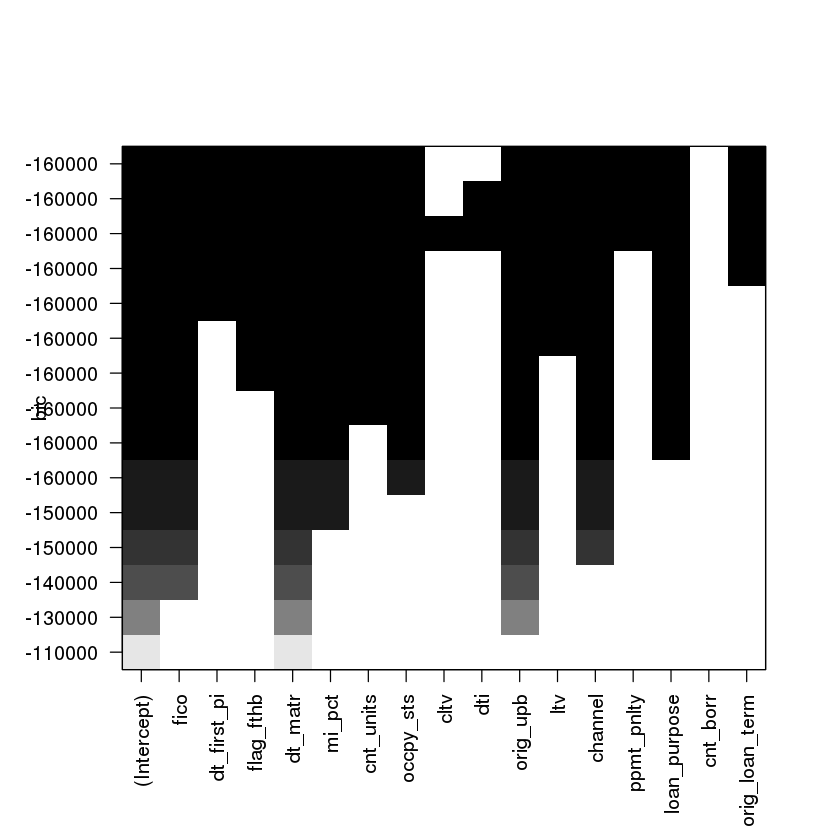

In [11]:
regfit.fwd=regsubsets(int_rt~.,data=df.data.1,nvmax=17, method="forward") 
plot(regfit.fwd)
#F=summary(regfit.bwd)
#names(F)
reg.summary = summary(regfit.fwd) 
        
print("['fico','dt_first_pi','flag_fthb','dt_matr','cd_msa','mi_pct','cnt_units', 'occpy_sts','cltv','dti','orig_upb','ltv','int_rt','channel','ppmt_pnlty','prod_type','st', 'prop_type','zipcode','id_loan','loan_purpose', 
       'orig_loan_term','cnt_borr','seller_name','servicer_name', 'flag_sc']")

names(reg.summary)
reg.summary$rss
reg.summary$adjr2  

### Feature Selection using Backward Search

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”

Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“number of items to replace is not a multiple of replacement length”

[1] "['fico','dt_first_pi','flag_fthb','dt_matr','cd_msa','mi_pct','cnt_units', 'occpy_sts','cltv','dti','orig_upb','ltv','int_rt','channel','ppmt_pnlty','prod_type','st', 'prop_type','zipcode','id_loan','loan_purpose', \n       'orig_loan_term','cnt_borr','seller_name','servicer_name', 'flag_sc']"


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 35085.53 32867.55 31893.27 31330.50 30750.67 30491.84 30356.04 30236.74
 [9] 30156.88 30076.25 30008.35 29959.23 29952.67 29952.47 29952.41

[1] 0.2627250 0.3093309 0.3298022 0.3416262 0.3538089 0.3592461 0.3620978
 [8] 0.3646031 0.3662794 0.3679720 0.3693971 0.3704275 0.3705637 0.3705659
[15] 0.3705654

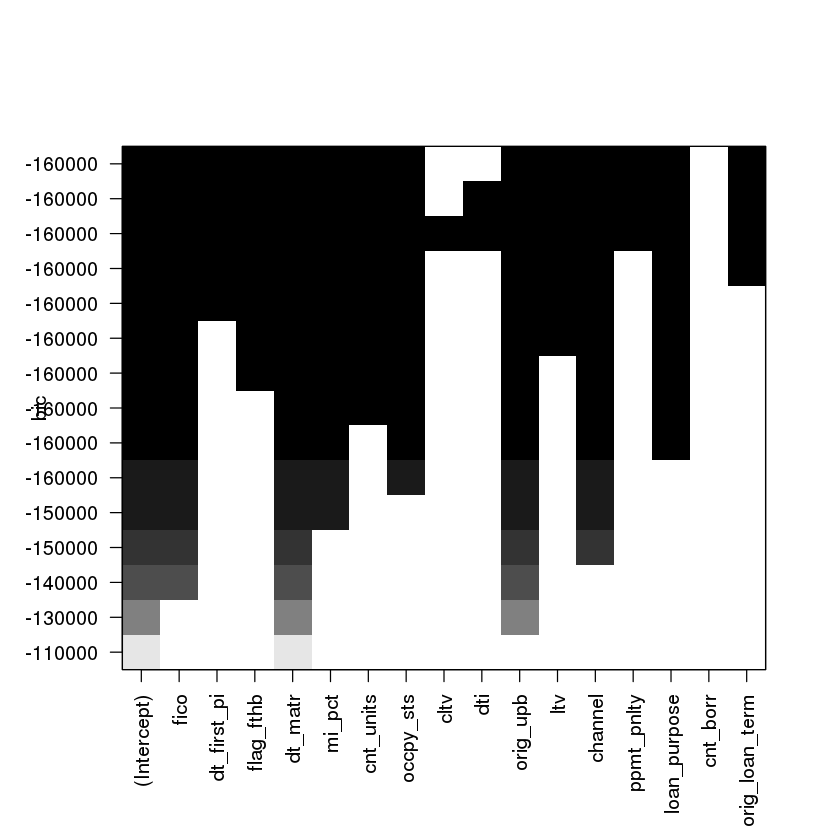

In [13]:
regfit.bwd=regsubsets(int_rt~.,data=df.data.1,nvmax=17, method="backward") 
plot(regfit.bwd)
reg.summary = summary(regfit.bwd) 
        
print("['fico','dt_first_pi','flag_fthb','dt_matr','cd_msa','mi_pct','cnt_units', 'occpy_sts','cltv','dti','orig_upb','ltv','int_rt','channel','ppmt_pnlty','prod_type','st', 'prop_type','zipcode','id_loan','loan_purpose', 
       'orig_loan_term','cnt_borr','seller_name','servicer_name', 'flag_sc']")

names(reg.summary)
reg.summary$rss
reg.summary$adjr2  

### Feature Selection using Stepwise Search

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”

Reordering variables and trying again:
[1] "['fico','dt_first_pi','flag_fthb','dt_matr','cd_msa','mi_pct','cnt_units', 'occpy_sts','cltv','dti','orig_upb','ltv','int_rt','channel','ppmt_pnlty','prod_type','st', 'prop_type','zipcode','id_loan','loan_purpose', \n       'orig_loan_term','cnt_borr','seller_name','servicer_name', 'flag_sc']"


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 35085.53 32867.55 45552.97 31330.50 30750.67 30491.84 30356.04 30236.74
 [9] 30156.88 30076.25 30008.35 29959.23 29952.67 29952.47 29952.41

[1] 0.26272501 0.30933088 0.04276028 0.34162624 0.35380887 0.35924607
 [7] 0.36209780 0.36460310 0.36627941 0.36797198 0.36939714 0.37042752
[13] 0.37056367 0.37056595 0.37056545

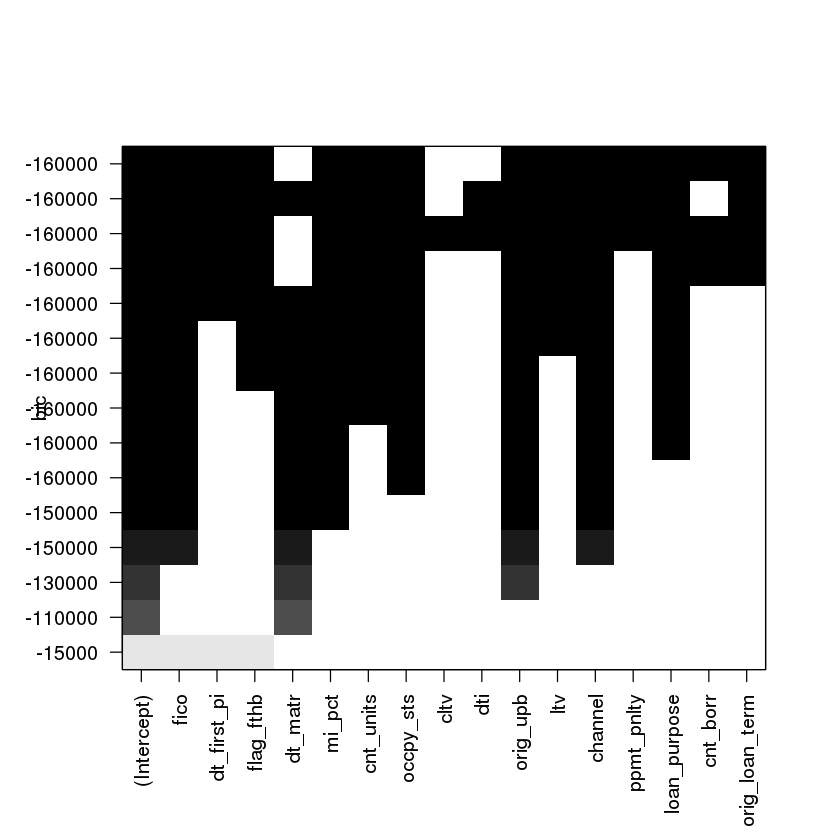

In [14]:
regfit.stp=regsubsets(int_rt~.,data=df.data.1,nvmax=17, method="seqrep") 
plot(regfit.stp)
reg.summary = summary(regfit.stp) 
        
print("['fico','dt_first_pi','flag_fthb','dt_matr','cd_msa','mi_pct','cnt_units', 'occpy_sts','cltv','dti','orig_upb','ltv','int_rt','channel','ppmt_pnlty','prod_type','st', 'prop_type','zipcode','id_loan','loan_purpose', 
       'orig_loan_term','cnt_borr','seller_name','servicer_name', 'flag_sc']")

names(reg.summary)
reg.summary$rss
reg.summary$adjr2  

### Random Forest Algorithm with train data = Q12007 and test data = Q22007  

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


rf = RandomForestRegressor(n_estimators=15)
rf.fit(x_train, y_train.values.ravel())

data_estimate_train = rf.predict(x_train)
data_estimate_test = rf.predict(x_test)

rms_train = mean_squared_error(y_train, data_estimate_train)
rms_test = mean_squared_error(y_test, data_estimate_test)

mae_train = mean_absolute_error(y_train, data_estimate_train)
mae_test = mean_absolute_error(y_test, data_estimate_test)

mape_train = np.mean(np.abs((y_train - data_estimate_train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - data_estimate_test) / y_test)) * 100


print("rms_train = ",rms_train,"   rms_test = ",rms_test )
print("mae_train = " ,mae_train ,"   mae_test = ",mae_test )
print("mape_train = " ,float(mape_train),"   mape_test = ",float(mape_test))
print("mean_interest_train = ",np.mean(data_estimate_train),"mean_interest_test = ",np.mean(data_estimate_test))

rms_train =  0.0187770471173    rms_test =  0.104282642307
mae_train =  0.0996706518608    mae_test =  0.260233029966
mape_train =  1.9459029186358814    mape_test =  5.370883050888085
mean_interest_train =  5.12591509631 mean_interest_test =  5.07332604867


In [ ]:
### Random Forest Algorithm with train data = Q22007 and test data = Q32007  

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

rf = RandomForestRegressor(n_estimators=15)
rf.fit(x_train, y_train.values.ravel())

data_estimate_train = rf.predict(x_train)
data_estimate_test = rf.predict(x_test)

rms_train = mean_squared_error(y_train, data_estimate_train)
rms_test = mean_squared_error(y_test, data_estimate_test)

mae_train = mean_absolute_error(y_train, data_estimate_train)
mae_test = mean_absolute_error(y_test, data_estimate_test)

mape_train = np.mean(np.abs((y_train - data_estimate_train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - data_estimate_test) / y_test)) * 100

print("rms_train = ",rms_train,"   rms_test = ",rms_test )
print("mae_train = " ,mae_train ,"   mae_test = ",mae_test )
print("mape_train = " ,float(mape_train),"   mape_test = ",float(mape_test))
print("mean_interest_train = ",np.mean(data_estimate_train),"mean_interest_test = ",np.mean(data_estimate_test))

rms_train =  0.0112466296893    rms_test =  0.0730066831499
mae_train =  0.0769147876276    mae_test =  0.209861812121
mape_train =  1.5529447508502447    mape_test =  4.217573087951447
mean_interest_train =  4.92718963382 mean_interest_test =  4.88756656339


### Random Forest Algorithm with train data = Q32007 and test data = Q42007  

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

rf = RandomForestRegressor(n_estimators=15)
rf.fit(x_train, y_train.values.ravel())

data_estimate_train = rf.predict(x_train)
data_estimate_test = rf.predict(x_test)

rms_train = mean_squared_error(y_train, data_estimate_train)
rms_test = mean_squared_error(y_test, data_estimate_test)

mae_train = mean_absolute_error(y_train, data_estimate_train)
mae_test = mean_absolute_error(y_test, data_estimate_test)

mape_train = np.mean(np.abs((y_train - data_estimate_train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - data_estimate_test) / y_test)) * 100

print("rms_train = ",rms_train,"   rms_test = ",rms_test )
print("mae_train = " ,mae_train ,"   mae_test = ",mae_test )
print("mape_train = " ,float(mape_train),"   mape_test = ",float(mape_test))
print("mean_interest_train = ",np.mean(data_estimate_train),"mean_interest_test = ",np.mean(data_estimate_test))

rms_train =  0.0214698066654    rms_test =  0.255924996718
mae_train =  0.106166786862    mae_test =  0.410627892459
mape_train =  1.599633149314283    mape_test =  6.6554367510884695
mean_interest_train =  6.66395032243 mean_interest_test =  6.64942108236


In [ ]:
### Random Forest Algorithm with train data = Q42007 and test data = Q12008  

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

rf = RandomForestRegressor(n_estimators=15)
rf.fit(x_train, y_train.values.ravel())

data_estimate_train = rf.predict(x_train)
data_estimate_test = rf.predict(x_test)

rms_train = mean_squared_error(y_train, data_estimate_train)
rms_test = mean_squared_error(y_test, data_estimate_test)

mae_train = mean_absolute_error(y_train, data_estimate_train)
mae_test = mean_absolute_error(y_test, data_estimate_test)

mape_train = np.mean(np.abs((y_train - data_estimate_train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - data_estimate_test) / y_test)) * 100

print("rms_train = ",rms_train,"   rms_test = ",rms_test )
print("mae_train = " ,mae_train ,"   mae_test = ",mae_test )
print("mape_train = " ,float(mape_train),"   mape_test = ",float(mape_test))
print("mean_interest_train = ",np.mean(data_estimate_train),"mean_interest_test = ",np.mean(data_estimate_test))

rms_train =  0.0253632547068    rms_test =  0.474052868383
mae_train =  0.115710810831    mae_test =  0.580654761959
mape_train =  1.8196654988012189    mape_test =  10.329377656948878
mean_interest_train =  6.35899465151 mean_interest_test =  6.37215573957
